### Régréssion Linéaire prix de vente en fonction de la surface habitable ( square feet ) 

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

df = pd.read_csv('files_csv/train.csv', index_col=0)
print(df.shape)

(1460, 80)


In [38]:
print(df.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleType' '

In [39]:
partial_df = df[['GrLivArea','SalePrice']]
partial_df.head(5)

,GrLivArea,SalePrice
Id,,
1,1710,208500
2,1262,181500
3,1786,223500
4,1717,140000
5,2198,250000


### Corrélation Surface Prix de vente ? 

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

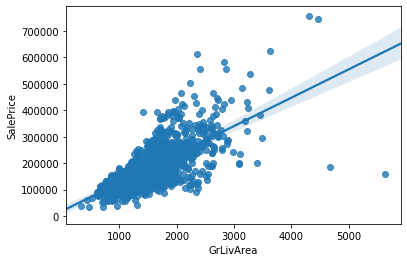

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='GrLivArea',y='SalePrice', data=partial_df)
plt.show

### Split du dataset initial train/val

In [41]:
train, val=train_test_split(partial_df, test_size=0.3)

print("Train full shape: " + str(partial_df.shape))
print("Train shape: " + str(train.shape))
print("Val shape: " + str(val.shape))

Train full shape: (1460, 2)
Train shape: (1022, 2)
Val shape: (438, 2)


### Préparation train set et val set

In [42]:
target_column = 'SalePrice'
y_train = train[target_column].values
print(y_train)

[305900 125000 129000 ... 108000 144500 118500]


In [43]:
X_train = train.drop(target_column, axis=1).values
print(X_train)

[[2000]
 [1728]
 [1120]
 ...
 [1510]
 [ 848]
 [1029]]


In [44]:
X_val = val.drop(target_column, axis=1).values
y_val = val[target_column].values

### Modèle

In [45]:
simplelinearRegression = LinearRegression()
simplelinearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Application du modele au val set & Mesure de la performance ( R2 ) 
Modele parfait , R² = 1 

In [46]:
y_val_predict = simplelinearRegression.predict(X_val)
r2_score(y_val, y_val_predict) 

0.4647411246155472

### Test du modele avec une surface au hasard
Maison de 2000 pieds carré ( 185m² ) 

In [47]:
dict = {
    "GrLivArea" : [2000]
}

In [48]:
df_house = pd.DataFrame(dict)
df_house

,GrLivArea
0,2000


In [49]:
X_predict = df_house.values
print(X_predict)

# Pas vraiment utile de refaire un dataframe , on peut directement faire 
# y_predict = simplelinearRegression.predict([[2000]])

y_predict = simplelinearRegression.predict(X_predict)
price = y_predict[0]
print(f"Le modele prédit un prix de vente de {np.around(price)} $")


[[2000]]
Le modele prédit un prix de vente de 237269.0 $
